# Introduction of Python Packages

### Numpy
- Handling large, multi-dimensional arrays and matrices
- High-level mathematical functions
- https://numpy.org/

### Pandas
- Data manipulation and analysis - data table structure
- https://pandas.pydata.org/

### Matplotlib
- Plotting library
- https://matplotlib.org/

### Seaborn
- Data visulaization
- https://seaborn.pydata.org/#

# Understanding NumPy Arrays

### Importing a package

In [ ]:
import numpy as np

### Creating arrays

In [ ]:
a = np.array([2,4,6,8,1])
print(a)

### Creating matrix
- (2 X 5)
- (2 X 5 X 3)

In [ ]:
b = np.array([[2,4,6,8,1],[5,7,8,3,2]]) #two-times square bracket 
print(b)

In [ ]:
b

In [ ]:
c = np.array([[[2,4,6,8,1],[5,7,8,3,2]],
             [[1,2,3,4,7],[3,5,7,7,8]],
             [[5,2,1,1,7],[8,2,2,3,2]]]) 
print(c)

### Creating arrays using function

In [ ]:
p = np.zeros((3,3))
print(p)

In [ ]:
p = np.ones((3,3))
print(p)

In [ ]:
p = np.full((2,2),7)
print(p)

In [ ]:
p = np.eye(4)
print(p)

In [ ]:
t = np.random.random((3,3))
print(t)

### Selecting array elements

In [ ]:
print(a)

In [ ]:
print(a[0])
print(a[3])

In [ ]:
print(b)

In [ ]:
print(b[0,1])
print(b[1,4])

In [ ]:
b[1,4] = 7
print(b)

### Operation

In [ ]:
A = np.array([[1,-2],[3,5]])
B = np.array([[0,3],[2,2]])
print(A)
print(B)

In [ ]:
print(A + B)

In [ ]:
print(A * B)

In [ ]:
print(A @ B)

In [ ]:
print(np.abs(A))

In [ ]:
print(np.sqrt(B))

In [ ]:
print(np.sum(A))

In [ ]:
print(np.sum(A, axis=0))

In [ ]:
print(np.sum(A, axis=1))

In [ ]:
print(np.sum(A))
print(A.sum())

In [ ]:
print(np.sum(A, axis=0))
print(A.sum(axis=0))

# Understanding Pandas Dataframes

### Import pandas package

In [ ]:
import pandas as pd

### Create dataframe

In [ ]:
data = {'Name':['Kim','Jane','Kevin','Jin'],'Age':[23, 45, 46, 52]}

In [ ]:
print(data)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

# Data Import Using Pandas 
- csv file (comma-separated values)
- Go to LearnUS download the data "Pdata.csv" and "Pdata_description.xlsx" (location: Class Files - Personal trip data)
- Copy "Pdata.csv" in the folder of Jupyter Notebook Script
- Check "Pdata_description.xlsx" which includes the descriptions of Pdata

### Importing a csv file

In [ ]:
Pdata = pd.read_csv("Pdata.csv")

In [ ]:
Pdata

In [ ]:
Pdata.head(10)

In [ ]:
Pdata.tail(10)

In [ ]:
Pdata.describe()

# Data Manupulating using Pandas

### Selecting a column

In [ ]:
Trips = Pdata['NofTrips']
Trips

In [ ]:
Pdata.NofTrips

### Create variables

In [ ]:
# Create "Age"
Pdata["Age"] = 2016-Pdata["Byear"]
Pdata

Create age group: 
- (1) create a function for categorizing age, and 
- (2) use "apply()" method which applys a function along an axis of the DataFrame


In [ ]:
#  Create age group: (1) create a function for categorizing age
def Age_category(row):
    if row['Age'] > 60:
        return '60s'
    elif row['Age'] > 50:
        return '50s'
    elif row['Age'] > 40:
        return '40s'
    elif row['Age'] > 30:
        return '30s'
    elif row['Age'] > 20:
        return '20s'
    else:
        return '10s'

In [ ]:
#  Create age group: (2) use "apply()" method

Pdata['Age_G'] = Pdata.apply(lambda row: Age_category(row), axis=1)

Pdata


In [ ]:
#  Categorize job: "apply()" method
## (1) create a function for categorizing job
def Job_category(row):
    if (row['Job'] == 7)|(row['Job'] == 8):
        return 'Unemployed'
    else:
        return 'Employed'

## (2) use "apply()" method
Pdata['Job_G'] = Pdata.apply(lambda row: Job_category(row), axis=1)

Pdata.head()


In [ ]:
#  Expanding display
pd.set_option('display.max_columns',None)
Pdata.head()

### Select subset

In [ ]:
# Older than 50 years
Pdata_gt50 = Pdata[Pdata["Age"]>50]
Pdata_gt50

In [ ]:
Pdata_gt50.describe()

In [ ]:
# Select subset
# 60s & Employed
Pdata_60s_Emp = Pdata[(Pdata["Age_G"]=="60s")&(Pdata["Job_G"]=="Employed")]
Pdata_60s_Emp

In [ ]:
Pdata_60s_Emp.describe()

# Basic Data Exploration Using Pandas

### Pivot table

In [ ]:
# Average number of trips by age group and occupancy
pd.pivot_table(Pdata, values='NofTrips', index=['Age_G'], columns=['Job_G'], aggfunc=np.mean)

In [ ]:
# Average number of trips by age group and occupancy + margin
pd.pivot_table(Pdata, values='NofTrips', index=['Age_G'], columns=['Job_G'], aggfunc=np.mean, margins=True)

In [ ]:
# Average shopping duration by household income and gender
pd.pivot_table(Pdata, values='Shop_AD', index=['HHinc'], columns=['Gender'], aggfunc=np.mean)

In [ ]:
# Average number of trips by carownership and age group
pd.pivot_table(Pdata, values='NofTrips', index=['Ncars'], columns=['Age_G'], aggfunc=np.mean)

### Group data (Aggregate)

In [ ]:
# Extracting "Gu" index
Pdata["Dcode"] = Pdata["Dcode"].apply(str)
Pdata["Gcode"] = Pdata.Dcode.apply(lambda x: x[:4])


Pdata

In [ ]:
# Grouping by "Gu"
G_summary = Pdata.groupby('Gcode').mean()
G_summary

In [ ]:
# Sorting with respect to the number of trips
G_summary.sort_values(by=['NofTrips'])

In [ ]:
# Sorting with respect to the number of trips
G_summary.sort_values(by=['NofTrips'], ascending=False)

# More information about Data Analysis Using Pandas

### pandas API document
https://pandas.pydata.org/docs/reference/index.html

# Data Visualization Using Pandas

### Line and bar charts

In [ ]:
# Example data
df = pd.pivot_table(Pdata, values='NofTrips', index=['Age_G'], columns=['Job_G'], aggfunc=np.mean)
df

In [ ]:
# Line plot
df.plot()

In [ ]:
# Add label
df.plot(ylabel='Average number of trips', xlabel='Age')

In [ ]:
# Bar plot
df.plot(kind='bar')

In [ ]:
# Add label
df.plot(kind='bar',ylabel='Average number of trips', xlabel='Age')

### Scatter plot

In [ ]:
# Scatter plot with respect to age and travel time
Pdata.plot.scatter(x='Age', y='TripTime')

In [ ]:
# Coloring
Pdata.plot.scatter(x='Age', y='TripTime',
                  c=['C0' if c =="Employed" else 'C1' for c in Pdata.Job_G])

### Histogram

In [ ]:
# Histogram with respect to travel time
Pdata.TripTime.hist()

In [ ]:
# Range control
Pdata.TripTime.hist(bins=30)

### Box plot
- Properties
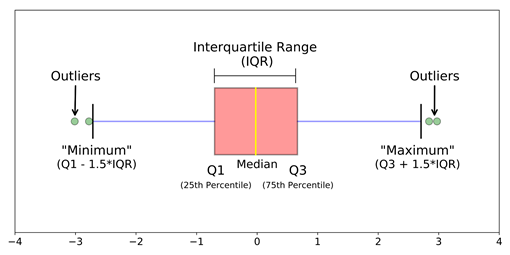

In [ ]:
# Box plot with respect to travle time
Pdata.boxplot(column='TripTime')

In [ ]:
# Box plot with respect to travle time by employment status
Pdata.boxplot(column='TripTime', by='Job_G')

# Data Visualization Using Matplotlib

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# Create a plot
fig, ax = plt.subplots()

### Line plot

In [ ]:
# Line plot: an example
fig, ax = plt.subplots()
ax.plot([1,2,3,4], [1,4,2,3]);

### Box plot

In [ ]:
# Box plot with respect to Trip time
fig, ax = plt.subplots()
ax.boxplot(Pdata.TripTime); #Due to "NaN" , it doesn't work.

In [ ]:
Pdata.head(20)

In [ ]:
# Box plot with respect to Trip time with non-trip data
fig, ax = plt.subplots()
ax.boxplot(Pdata.TripTime[Pdata.Trip_made==1]);

### Multiple plots

In [ ]:
# Create multiple plots
fig, axes = plt.subplots(nrows=1, ncols=4)

In [ ]:
# Multiple plots
fig, axes = plt.subplots(nrows=1, ncols=4)
Pdata.boxplot(column='TripTime', by='Job_G', ax=axes[0])
Pdata.boxplot(column='NofTrips', by='Job_G', ax=axes[1])
Pdata.boxplot(column='Shop_TT', by='Job_G', ax=axes[2])
Pdata.boxplot(column='Shop_AD', by='Job_G', ax=axes[3])

In [ ]:
# Add adjustment
fig, axes = plt.subplots(nrows=1, ncols=4)
Pdata.boxplot(column='TripTime', by='Job_G', ax=axes[0])
Pdata.boxplot(column='NofTrips', by='Job_G', ax=axes[1])
Pdata.boxplot(column='Shop_TT', by='Job_G', ax=axes[2])
Pdata.boxplot(column='Shop_AD', by='Job_G', ax=axes[3])
plt.suptitle('')
plt.tight_layout()

### Bar plot

In [ ]:
G_summary = Pdata.groupby('Gcode').mean()
fig, ax = plt.subplots()
ax.bar(G_summary.index, G_summary.Work_TT, color=['C1','C2','C3','C4','C5']) # 주의할것 Gcode로 하면 안됨. index로 해야함(Grouping 한 경우)
ax.set_xlabel("Gu code")
ax.set_ylabel("Average commuting time")
plt.title("Comparison of commuting time by Gu")


### For more information about Matplotlib
https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

# Data Visualization Using Seaborn

In [ ]:
import seaborn as sns

### Histogram and Kernel density

In [ ]:
# Histogram with respec to trip time
sns.displot(data = Pdata, x="TripTime")

In [ ]:
# Kernel density with respec to trip time
sns.displot(data = Pdata, x="TripTime", kind="kde")

In [ ]:
# Overlap
sns.displot(data = Pdata, x="TripTime", kde=True)

In [ ]:
# Comparison by employment status
sns.displot(data = Pdata, x="TripTime", hue="Job_G", kind="kde")

In [ ]:
# Comparison by age group
sns.displot(data = Pdata, x="TripTime", hue="Age_G", kind="kde")

### Density plots with 2 dimensions

In [ ]:
# Density plot with respect to travel time and commute time
sns.displot(data = Pdata, x="TripTime", y="Work_TT")

In [ ]:
# Density plot with respect to travel time and commute time coloring by employment status
sns.displot(data = Pdata, x="TripTime", y="Work_TT", hue="Job_G")

In [ ]:
# Kernel density plot with respect to travel time and commute time
sns.displot(data = Pdata, x="TripTime", y="Work_TT", kind="kde")

In [ ]:
# Kernel density plot with respect to travel time and commute time by employment status
sns.displot(data = Pdata, x="TripTime", y="Work_TT", kind="kde", hue="Job_G")

### Joint plot

In [ ]:
# Joint plot with respect to shopping travel time and shopping duration
sns.jointplot(data = Pdata[(Pdata.Shop_AD>0)], x="Shop_TT", y="Shop_AD")

In [ ]:
# Joint plot with respect to shopping travel time and shopping duration by employemnt status
sns.jointplot(data = Pdata[(Pdata.Shop_AD>0)], x="Shop_TT", y="Shop_AD", hue="Job_G")

### For more information
"seaborn" manual: https://seaborn.pydata.org/#:~:text=Seaborn%20is%20a%20Python%20data,introductory%20notes%20or%20the%20paper.